In [1]:
import Bandits.Environments_StochasticBandits as env
import Bandits.Algorithms_Baselines as alg
import Bandits.Algorithms_MyStrategy as myalg
import Bandits.Experiments_MakeBanditExperiments as xps
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload # utilisation : 'reload(xps)'
import time
import seaborn as sns; sns.set() # seaborn makes plots more beautiful

## I) Setting-up experiments

### Q1
- `env.StochasticBandit(nbArms)` crée une instance de Bandit, de lois encore indéterminées.
- `bandit.createBernoulliArmsFromMeans([0.2,0.4,0.6])` intitialise le bandit avec des lois de Bernoulli de moyenne données.
- `alg.FTL(nbArms)` crée une instance d'agent doté de la stratégie Follow The Lead.
- `xps.OneBanditOneLearnerOneRun(bandit, learner, timeHorizon)` lance une simulation d'un agent qui interagit `timeHorizon` fois avec un bandit. A l'issue de ces `timeHorizon` étapes, la fonction retourne toutes les informations utiles sur les historiques de la simulation (tirages,récompenses, regrets).
- `xps.plotOneBanditOneLearnerOneRun(name, arms, rewards, regrets, cumulativeregrets, show=True)` affiche les historiques de la simulation.

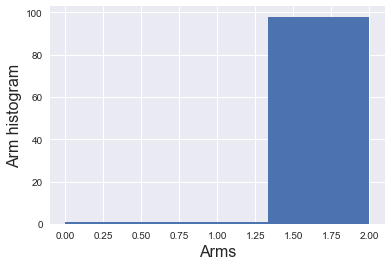

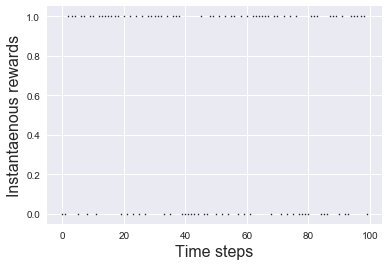

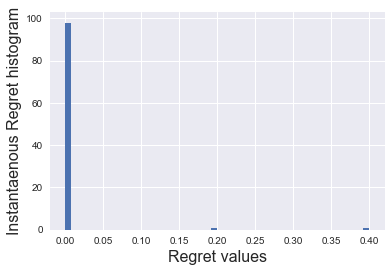

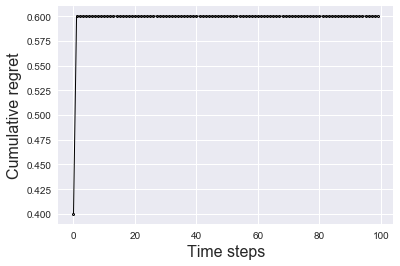

In [2]:
nbArms=3
timeHorizon = 100
# 1. Create a bandit environment
bandit = env.StochasticBandit(nbArms)
bandit.createBernoulliArmsFromMeans([0.2,0.4,0.6])
# bandit.createBernoulliArms(0.1) # Using a minimal gap of 0.1

#2. Create a bandit algorithm
learner = alg.FTL(nbArms)
# learner = alg.UCB(nbArms)
# learner = alg.myUCB(nbArms)
# learner = alg.KLUCB(nbArms)
# learner = alg.TS(nbArms)
# learner = alg.BESA(nbArms)

#3. Run an experiment and collects data
arms,rewards,regrets,cumulativeregrets = xps.OneBanditOneLearnerOneRun(bandit, learner, timeHorizon)

# 4. Generate a name and plot the data
name = str(int(time.time())) + bandit.name() + "-" + learner.name()
xps.plotOneBanditOneLearnerOneRun(name, arms, rewards, regrets, cumulativeregrets, show=True)

### Q2
L'agent FTL converge vers un bras qu'il tire de façon constante. cependant, selon la simulation, il arrive que l'agent apprend à tirer un bras sous-optimal : il suffit que parmi les `nbBras` premiers tirages, seul 1 bras donne une récompense de 1, c'est alors ce bras que l'agent FTL va considérer comme optimal.

Si `timeHorizon` est assez grand, la distribution des bras tirés permet de visualiser quel bras l'agent finit par choisir. Lorsque le bras 2 est choisi le regret cumulé est constant ; sinon, il est linéaire.

### Q3 & Q4
Conformément aux observations faites précédemment, la courbe des moyennes des regrets est linéaire croissante. Dans l'histogramme, les $R_{T,n}$ faibles correspondent aux agents qui ont convergé vers le bras 0.6. De façon similaire, les $R_{T,n}$ intermédiaires (resp. élevés) correspondent aux agents qui ont convergé vers le bras 0.4 (resp. 0.2).

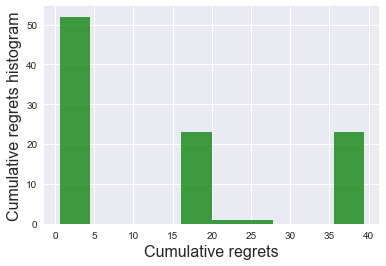

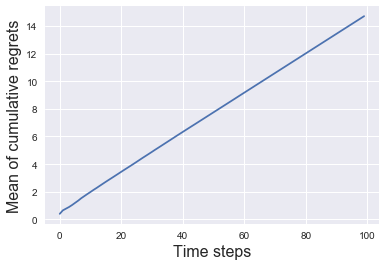

In [3]:
n = 100

all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learner, timeHorizon, n)

xps.plotOneBanditOneLearnerNRuns(all_cumulativeregrets)

## II) The UCB algorithm

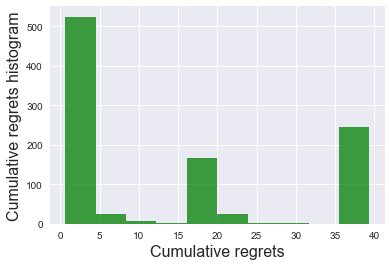

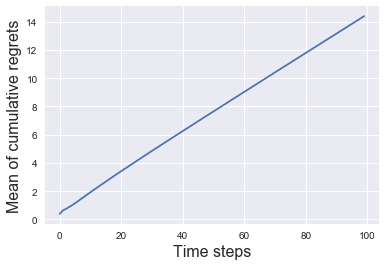

Expected regret with learner FTL over  1000 runs, and time horizon = 100 
 Moyenne =  14.391 + ou - 0.991077791884 à 95%
 Ecart type =  15.9901181672


In [4]:
# 1. Create a bandit environment
nbArms=3
bandit = env.StochasticBandit(nbArms)
bandit.createBernoulliArmsFromMeans([0.2,0.4,0.6])

#2. Create a bandit algorithm
learner = alg.FTL(nbArms)
#learner = alg.UCB(nbArms)

#3. Run an experiment and collects data
timeHorizon = 100
arms,rewards,regrets,cumulativeregrets = xps.OneBanditOneLearnerOneRun(bandit, learner, timeHorizon)

# 4. Generate a name and plot the data
n = 1000
all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learner, timeHorizon, n)
xps.plotOneBanditOneLearnerNRuns(all_cumulativeregrets)

m = np.mean(all_cumulativeregrets[timeHorizon-1,:])
s = np.std(all_cumulativeregrets[timeHorizon-1,:])
print("Expected regret with learner",learner.name(),"over ",n,"runs, and time horizon =",timeHorizon,"\n",
      "Moyenne = ", m, "+ ou -", 1.960*s/np.sqrt(n),"à 95%\n",
      "Ecart type = ",s)

Pour n=1000 runs, on trouve (intervalles de confiance à 95%) :
- FTL : moyenne $\approx 13.8 \pm 0.979$ et $std \approx 15.8$
- UCB : moyenne $\approx 10.4 \pm 0.153$ et $std \approx 2.47$

UCB a de meilleures performances en moyenne que l'algorithme naïf FTL. FTL obtient parfois des regrets très faibles, bien meilleurs que UCB, mais aussi des regrets trs élevés (en effet, la variance du regret final est élevée). On peut donc dire en ce sens que FTL n'est pas une stratégie "safe".

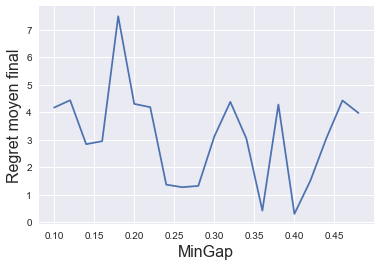

In [5]:
# 1. Create a bandit environment
nbArms=3

minGaps = np.arange(0.1,0.5,0.02)
ms = np.zeros((len(minGaps),1))
for i,minGap in enumerate(minGaps):
    bandit = env.StochasticBandit(nbArms)
    bandit.createBernoulliArms(0.1) # Using a minimal gap of 0.1

    #2. Create a bandit algorithm
    learner = alg.FTL(nbArms)
    #learner = alg.UCB(nbArms)

    #3. Run an experiment and collects data
    timeHorizon = 50
    arms,rewards,regrets,cumulativeregrets = xps.OneBanditOneLearnerOneRun(bandit, learner, timeHorizon)

    # 4. Generate a name and plot the data
    n = 50
    all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learner, timeHorizon, n)

    ms[i] = np.mean(all_cumulativeregrets[timeHorizon-1,:])
plt.plot(minGaps,ms)
plt.xlabel("MinGap",fontsize=16)
plt.ylabel("Regret moyen final",fontsize=16)
plt.show()

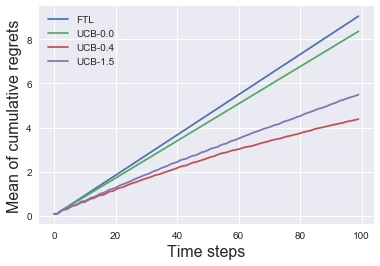

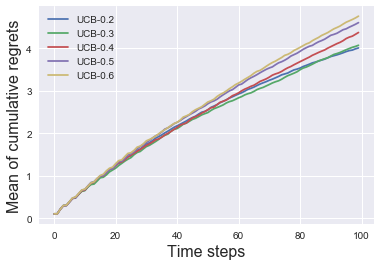

In [6]:
#alphas = np.arange(0,3,0.6)
alphas = np.array([0,0.4,1.5])

n = 100
timeHorizon = 100
learners = list()
learners.append(alg.FTL(nbArms))
for alpha in alphas:
    learners.append(alg.UCB(nbArms,alpha))

all_cumulativeregrets = xps.OneBanditNLearnersNRuns(bandit, learners, timeHorizon, n)
xps.plotOneBanditNLearnersNRuns(all_cumulativeregrets,learners)


alphas = np.array([0.2,0.3,0.4,0.5,0.6])

learners = list()
for alpha in alphas:
    learners.append(alg.UCB(nbArms,alpha))

all_cumulativeregrets = xps.OneBanditNLearnersNRuns(bandit, learners, timeHorizon, n)
xps.plotOneBanditNLearnersNRuns(all_cumulativeregrets,learners)

6) On voit sur ces tracés de regrets que les $alpha\in [0.4;0.6]$ donnent les regrets les plus sous-linéaires.

## III) Other UCB algorithms

UCB-0.5


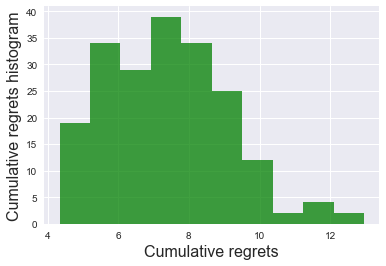

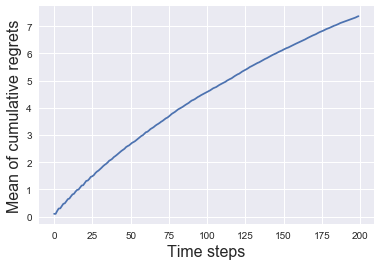

UCB_3_1-0.5


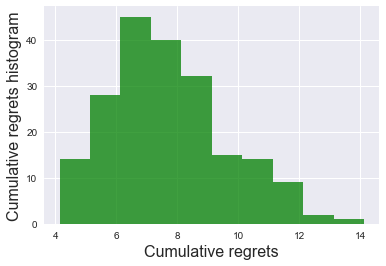

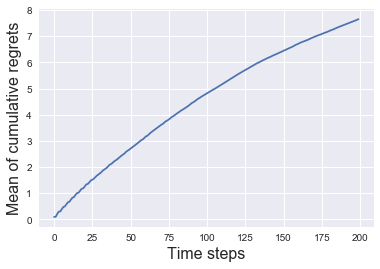

In [39]:
alpha = 0.5

n = 200
timeHorizon = 200
learners = list()
learners.append(alg.UCB(nbArms,alpha))
learners.append(myalg.UCB_3_1(nbArms,alpha))

for i in range(len(learners)):
    print(learners[i].name())
    all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learners[i], timeHorizon, n)
    xps.plotOneBanditOneLearnerNRuns(all_cumulativeregrets)

UCB-0.5


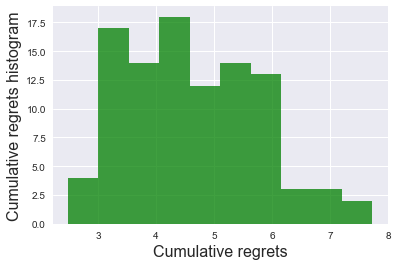

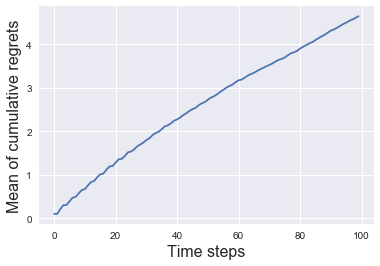

UCB_3_2-0.5


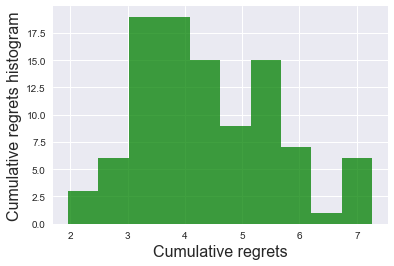

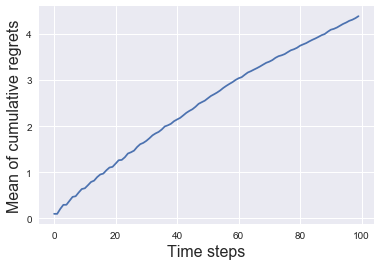

In [36]:
alpha = 0.5

n = 100
timeHorizon = 100
learners = list()
#learners.append(alg.UCB(nbArms,alpha))
learners.append(myalg.UCB_3_2(nbArms,alpha))

for i in range(len(learners)):
    print(learners[i].name())
    all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learners[i], timeHorizon, n)
    xps.plotOneBanditOneLearnerNRuns(all_cumulativeregrets)

UCB_3_3_a-3


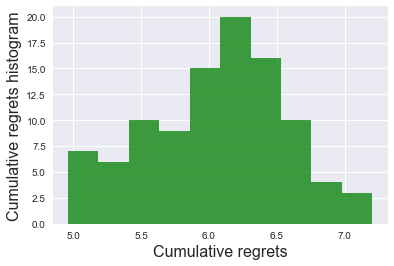

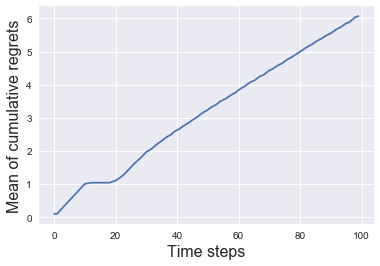

In [48]:
alpha = 0.5

n = 100
timeHorizon = 100
learners = list()
#learners.append(alg.UCB(nbArms,alpha))
learners.append(myalg.UCB_3_3_a(nbArms,alpha))

for i in range(len(learners)):
    print(learners[i].name())
    all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learners[i], timeHorizon, n)
    xps.plotOneBanditOneLearnerNRuns(all_cumulativeregrets)

UCB_3_3_b


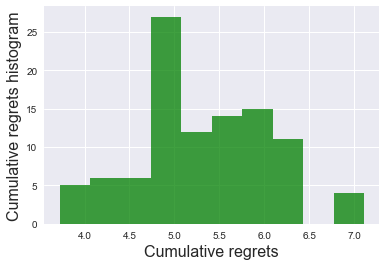

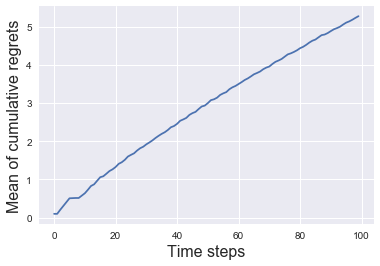

In [49]:
alpha = 0.5

n = 100
timeHorizon = 100
learners = list()
#learners.append(alg.UCB(nbArms,alpha))
learners.append(myalg.UCB_3_3_b(nbArms))

for i in range(len(learners)):
    print(learners[i].name())
    all_cumulativeregrets = xps.OneBanditOneLearnerNRuns(bandit, learners[i], timeHorizon, n)
    xps.plotOneBanditOneLearnerNRuns(all_cumulativeregrets)

## IV) Complexity of a bandit problem

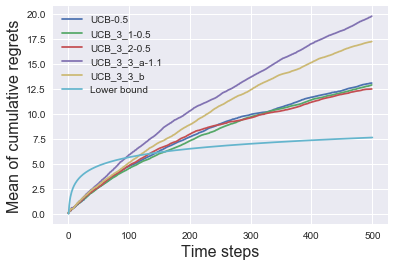

In [57]:
alpha = 0.5

n = 20
timeHorizon = 500
learners = list()
learners.append(alg.UCB(nbArms,alpha))
learners.append(myalg.UCB_3_1(nbArms,alpha))
learners.append(myalg.UCB_3_2(nbArms,alpha))
learners.append(myalg.UCB_3_3_a(nbArms,1.1))
learners.append(myalg.UCB_3_3_b(nbArms))

all_cumulativeregrets = xps.OneBanditNLearnersNRuns(bandit, learners, timeHorizon, n)
xps.plotOneBanditNLearnersNRuns(all_cumulativeregrets,learners, bandit=bandit, plot_bound=True)

Remember that the regret is bounded by the lower bound for T large enough. We indeed see that the theorem (Lai and Robbins, 1985) is asymptotically true.

In [47]:
reload(myalg)

<module 'Bandits.Algorithms_MyStrategy' from 'C:\\Users\\Lucas4\\Documents\\Centrale\\G3\\Apprentissage\\Apprentissage séquentiel\\TP1-stochastic-multi-armed\\Bandits\\Algorithms_MyStrategy.py'>

In [53]:
reload(xps)

<module 'Bandits.Experiments_MakeBanditExperiments' from 'C:\\Users\\Lucas4\\Documents\\Centrale\\G3\\Apprentissage\\Apprentissage séquentiel\\TP1-stochastic-multi-armed\\Bandits\\Experiments_MakeBanditExperiments.py'>

In [11]:
np.argmin()

array([ 0.,  0.,  0.,  0.,  0.])

In [12]:
9/25

0.36